In [1]:
## Importing the required python libraries 
import os, sys
import warnings
import timeit
import numpy as np
import pandas as pd 
import pkg_resources
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
# Importing data 
def getting_pergene_data(datafile):
    with open(datafile) as f:
        lines = f.readlines()[1:] #skip header

    genenames_list = [None]*len(lines)
    tnpergene_list = [None]*len(lines)
    readpergene_list = [None]*len(lines) 

    line_counter = 0
    for line in lines:
        l = re.split(','' |\t', line.strip('\n'))

        genenames_list[line_counter] = l[0]
        tnpergene_list[line_counter] = int(l[1])
        readpergene_list[line_counter] = int(l[2])

        line_counter += 1

    return genenames_list,tnpergene_list,readpergene_list



In [3]:
folder="../data/"
bem3_a_datafile=folder+ "dbem3_a/bem3_a_pergene_tab.txt"
bem3_b_datafile=folder+"dbem3_b/bem3_b_pergene_tab.txt"
bem3_gene,bem3_a_tn,bem3_a_reads=getting_pergene_data(bem3_a_datafile)
bem3_gene,bem3_b_tn,bem3_b_reads=getting_pergene_data(bem3_b_datafile)



<ipython-input-65-cb0e97abb767>:15: RuntimeWarning: invalid value encountered in true_divide
  ax[2].scatter(np.divide(bem3_a_reads,bem3_a_tn),np.divide(bem3_b_reads,bem3_b_tn))


Text(0, 0.5, 'dbem3_b')

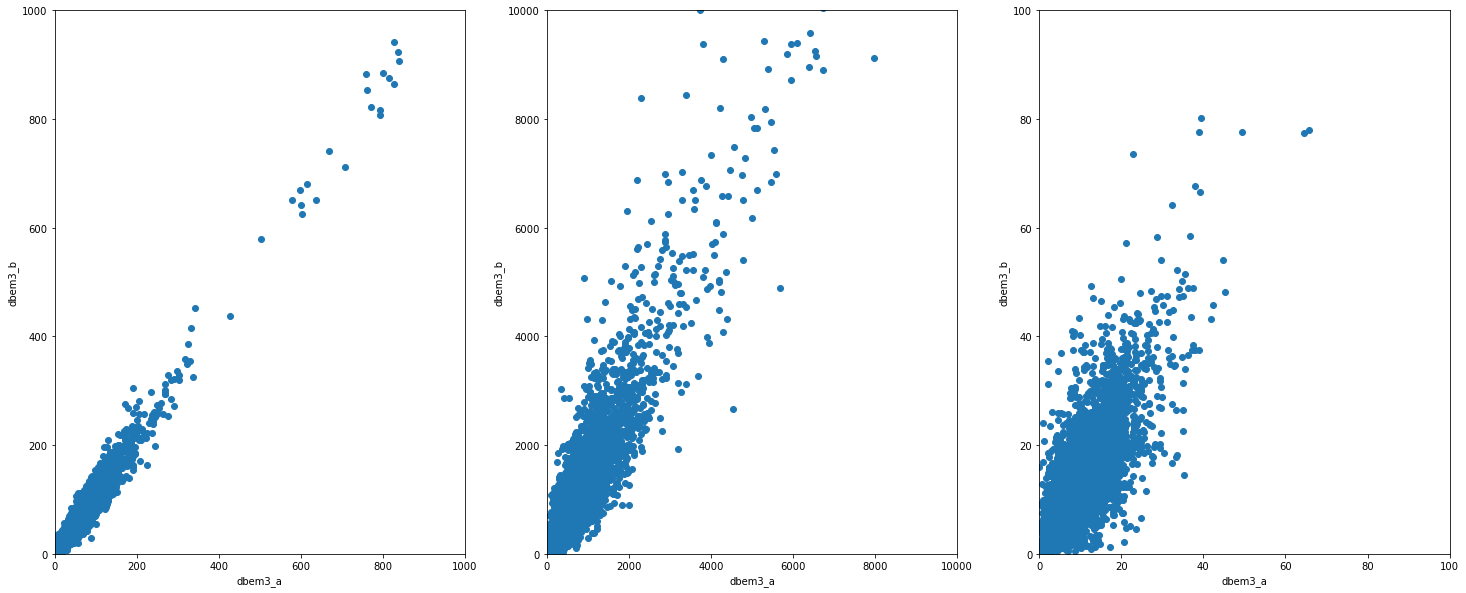

In [65]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(25,10))

ax[0].scatter(bem3_a_tn,bem3_b_tn)
ax[0].set_xlabel("dbem3_a")
ax[0].set_ylabel("dbem3_b")
ax[0].set_xlim(0,1000)
ax[0].set_ylim(0,1000)

ax[1].scatter(bem3_a_reads,bem3_b_reads)
ax[1].set_xlim(0,10000)
ax[1].set_ylim(0,10000)
ax[1].set_xlabel("dbem3_a")
ax[1].set_ylabel("dbem3_b")

ax[2].scatter(np.divide(bem3_a_reads,bem3_a_tn),np.divide(bem3_b_reads,bem3_b_tn))
ax[2].set_xlim(0,100)
ax[2].set_ylim(0,100)
ax[2].set_xlabel("dbem3_a")
ax[2].set_ylabel("dbem3_b")


In [4]:
def array2frame(arrays,index):
    df=pd.DataFrame(arrays)
    df=df.transpose()
    df.index=index
    df.columns=["transposons", "reads"]
    return df


In [5]:
bem3_a=[bem3_a_tn,bem3_a_reads]
bem3_b=[bem3_b_tn,bem3_b_reads]
index=bem3_gene

df_bem3_a=array2frame(bem3_a,bem3_gene)
df_bem3_b=array2frame(bem3_b,bem3_gene)

In [6]:
df_bem3=pd.concat([df_bem3_a,df_bem3_b],keys=["a","b"])
df_bem3.keys()

Index(['transposons', 'reads'], dtype='object')

In [56]:
plt.hist(df_bem3.loc["a","reads"],bins=4000,alpha=0.5,label="dbem3_a")
plt.hist(df_bem3.loc["b","reads"],bins=4000,alpha=0.3,label="dbem3_b"); 
plt.xlim(0,6000)
plt.xlabel("Reads")
plt.title("dbem3")
plt.legend()

In [49]:

for j in df_bem3.index:
    
    if df_bem3.loc[j,"transposons"]>5:

        df_bem3.loc[j,"reads-per-tr"]=df_bem3.loc[j,"reads"]/(df_bem3.loc[j,"transposons"]-1)

    else :
        df_bem3.loc[j,"reads-per-tr"]=0

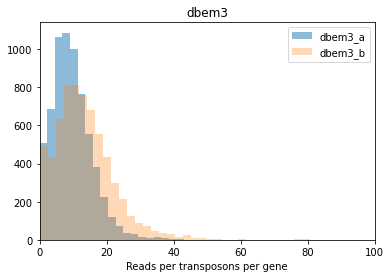

In [54]:
plt.hist(df_bem3.loc["a","reads-per-tr"],bins=200,alpha=0.5,label="dbem3_a")
plt.hist(df_bem3.loc["b","reads-per-tr"],bins=200,alpha=0.3,label="dbem3_b"); 
plt.xlim(0,100)
plt.xlabel("Reads per transposons per gene")
plt.title("dbem3")
plt.legend()

In [50]:
df_bem3

transposons  reads  reads-per-tr
a YAL069W             40    884     22.666667
  YAL068W-A           18    428     25.176471
  PAU8                31    210      7.000000
  YAL067W-A           15    218     15.571429
  SEO1                80   1245     15.759494
...                  ...    ...           ...
b ARR3                71   1004     14.342857
  YPR202W             92    738      8.109890
  YPR203W             62    721     11.819672
  YPR204W            438   4028      9.217391
  YPR204C-A           80    700      8.860759

[13200 rows x 3 columns]